In [377]:
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Prepare Data Set

## Read dataset

In [378]:
seed(10)
# read dataset
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0)
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.0773,17.08,Red,M,0
1,12098,689.000000,7.0100,0.02,Blue-white,A,3
2,2731,0.000437,0.0856,18.09,Red,M,0
3,37800,202900.000000,6.8600,-4.56,Blue,O,3
4,8570,0.000810,0.0097,14.20,Blue white,A,2
5,3605,126000.000000,1124.0000,-10.81,Red,M,5
6,8052,8.700000,1.8000,2.42,Whitish,A,3
7,3574,200000.000000,89.0000,-5.24,Red,M,4
8,8829,537493.000000,1423.0000,-10.73,White,A,5
9,3625,74000.000000,876.0000,-10.25,Red,M,5


In [379]:
df.shape

(200, 7)

## Cleaning Data

In [380]:
df['Color'].unique()

array(['Red', 'Blue-white', 'Blue', 'Blue white', 'Whitish', 'White',
       'Blue White', 'yellowish', 'white', 'yellow-white',
       'Yellowish White', 'Orange', 'White-Yellow', 'Pale yellow orange',
       'Orange-Red', 'Blue-White', 'Yellowish'], dtype=object)

In [381]:
color_mapper={
    'Blue-white':'Blue-White',
    'Blue white':'Blue-White',
    'Blue White':'Blue-White',
    'white':'White',
    'yellowish':'Yellowish',
    'yellow-white':'White-Yellow',
}
df['color']=df['Color'].replace(color_mapper)
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color
0,3453,0.000621,0.0773,17.08,Red,M,0,Red
1,12098,689.000000,7.0100,0.02,Blue-white,A,3,Blue-White
2,2731,0.000437,0.0856,18.09,Red,M,0,Red
3,37800,202900.000000,6.8600,-4.56,Blue,O,3,Blue
4,8570,0.000810,0.0097,14.20,Blue white,A,2,Blue-White
5,3605,126000.000000,1124.0000,-10.81,Red,M,5,Red
6,8052,8.700000,1.8000,2.42,Whitish,A,3,Whitish
7,3574,200000.000000,89.0000,-5.24,Red,M,4,Red
8,8829,537493.000000,1423.0000,-10.73,White,A,5,White
9,3625,74000.000000,876.0000,-10.25,Red,M,5,Red


In [382]:
df['color'].unique()
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color
0,3453,0.000621,0.07730,17.08,Red,M,0,Red
1,12098,689.000000,7.01000,0.02,Blue-white,A,3,Blue-White
2,2731,0.000437,0.08560,18.09,Red,M,0,Red
3,37800,202900.000000,6.86000,-4.56,Blue,O,3,Blue
4,8570,0.000810,0.00970,14.20,Blue white,A,2,Blue-White
...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2,Blue-White
196,19860,0.001100,0.01310,11.34,Blue,B,2,Blue
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3,Blue-White
198,39000,204000.000000,10.60000,-4.70,Blue,O,3,Blue


In [383]:
df['Spectral']= df['Spectral_Class']
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color,Spectral
0,3453,0.000621,0.07730,17.08,Red,M,0,Red,M
1,12098,689.000000,7.01000,0.02,Blue-white,A,3,Blue-White,A
2,2731,0.000437,0.08560,18.09,Red,M,0,Red,M
3,37800,202900.000000,6.86000,-4.56,Blue,O,3,Blue,O
4,8570,0.000810,0.00970,14.20,Blue white,A,2,Blue-White,A
...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2,Blue-White,B
196,19860,0.001100,0.01310,11.34,Blue,B,2,Blue,B
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3,Blue-White,A
198,39000,204000.000000,10.60000,-4.70,Blue,O,3,Blue,O


In [384]:
color_le = LabelEncoder()
df['color'] = color_le.fit_transform(df.color)

In [385]:
color_le.classes_

array(['Blue', 'Blue-White', 'Orange', 'Orange-Red', 'Pale yellow orange',
       'Red', 'White', 'White-Yellow', 'Whitish', 'Yellowish',
       'Yellowish White'], dtype=object)

In [386]:
Spectral_le = LabelEncoder()
df['Spectral'] = Spectral_le.fit_transform(df.Spectral)

In [387]:
Spectral_le.classes_

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [388]:
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color,Spectral
0,3453,0.000621,0.0773,17.08,Red,M,0,5,5
1,12098,689.000000,7.0100,0.02,Blue-white,A,3,1,0
2,2731,0.000437,0.0856,18.09,Red,M,0,5,5
3,37800,202900.000000,6.8600,-4.56,Blue,O,3,0,6
4,8570,0.000810,0.0097,14.20,Blue white,A,2,1,0
5,3605,126000.000000,1124.0000,-10.81,Red,M,5,5,5
6,8052,8.700000,1.8000,2.42,Whitish,A,3,8,0
7,3574,200000.000000,89.0000,-5.24,Red,M,4,5,5
8,8829,537493.000000,1423.0000,-10.73,White,A,5,6,0
9,3625,74000.000000,876.0000,-10.25,Red,M,5,5,5


We order and delete the columns of our data, cause we have to select then our inputs and targets. and we put the type to the end for make easy the process

In [389]:
del(df['Color'])
del(df['Spectral_Class'])
df=df[['Temperature','L','R','A_M','color','Spectral','Type']]

## Split Inputs/Target from Dataset

In [390]:
# shuffle dataset
df = df.sample(frac=1)

In [391]:
df

,Temperature,L,R,A_M,color,Spectral,Type
59,3575,123000.000000,45.0000,-6.78,5,5,4
5,3605,126000.000000,1124.0000,-10.81,5,5,5
20,28700,16790.000000,6.4000,-4.09,1,1,3
198,39000,204000.000000,10.6000,-4.70,0,6,3
52,3042,0.000500,0.1542,16.60,5,5,0
...,...,...,...,...,...,...,...
113,2831,0.000231,0.0915,16.21,5,5,0
64,3834,272000.000000,1183.0000,-9.20,5,5,5
15,17200,0.000980,0.0150,12.45,1,1,2
125,3095,0.000190,0.4920,10.87,5,5,1


In [392]:
inputs = df.iloc[:, 0:6]
target = df.iloc[:, 6:7] # Última columna

## Normalize Data

In [393]:
# scale input data
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)
inputs[0:10]

,0,1,2,3,4,5
0,0.042984,1.448047e-01,0.023090,0.160725,0.5,0.833333
1,0.043772,1.483365e-01,0.576852,0.034709,0.5,0.833333
2,0.703108,1.976643e-02,0.003280,0.244841,0.1,0.166667
3,0.973726,2.401639e-01,0.005436,0.225766,0.0,1.000000
4,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333
5,0.017919,6.121824e-10,0.000046,0.773296,0.5,0.833333
6,0.040750,3.178640e-01,0.780086,0.078799,0.5,0.833333
7,0.039227,6.945916e-10,0.000093,0.902439,0.5,0.833333
8,0.017367,3.767276e-10,0.000045,0.916823,0.5,0.833333
9,0.020809,4.202868e-10,0.000040,0.938399,0.5,0.833333


## Hot Encode Outputs

Target before hot encoding:

In [394]:
target.head()

,Type
59,4
5,5
20,3
198,3
52,0


here we hot enconde the output

In [395]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)

target.head()

D:\Users\Juslan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


## Split Training Set from Validation Set

In [396]:
# define training dataset size
ds_size = inputs.shape[0]
train_size_percentage = .8
test_size_percentage = .2

training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]

# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])

Training DS size: 160
Test DS size: 40


In [397]:
print('inputs:')
print(inputs[:10])
print('target')
target[:10]

inputs:
          0             1         2         3    4         5
0  0.042984  1.448047e-01  0.023090  0.160725  0.5  0.833333
1  0.043772  1.483365e-01  0.576852  0.034709  0.5  0.833333
2  0.703108  1.976643e-02  0.003280  0.244841  0.1  0.166667
3  0.973726  2.401639e-01  0.005436  0.225766  0.0  1.000000
4  0.028980  4.944550e-10  0.000075  0.891807  0.5  0.833333
5  0.017919  6.121824e-10  0.000046  0.773296  0.5  0.833333
6  0.040750  3.178640e-01  0.780086  0.078799  0.5  0.833333
7  0.039227  6.945916e-10  0.000093  0.902439  0.5  0.833333
8  0.017367  3.767276e-10  0.000045  0.916823  0.5  0.833333
9  0.020809  4.202868e-10  0.000040  0.938399  0.5  0.833333
target


,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


# Train Neural Network

## Define Neural Network Architecture

I try to add a new hidden layer, but i saw in my graphs that i was Overfitting my model. Thats why i am only with one Hidden Layer

In [398]:
# neural network
model = models.Sequential()

# input layer
model.add(layers.Dense(32, activation='relu', input_shape=(6,)))

# hidden layers
model.add(layers.Dense(16, activation='relu'))

# output layers
model.add(layers.Dense(6))
    
rmsprop = optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])

## Train IT!

In [416]:
num_epochs = 500
batch_size = 64

history = model.fit(input_training, target_training,
                            validation_data=(input_test, target_test),
                            epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0421 - categorical_accuracy: 0.9000 - val_loss: 0.0948 - val_categorical_accuracy: 0.6250
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0554 - categorical_accuracy: 0.8687 - val_loss: 0.0323 - val_categorical_accuracy: 0.8750
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0283 - categorical_accuracy: 0.9125 - val_loss: 0.0579 - val_categorical_accuracy: 0.9000
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0592 - categorical_accuracy: 0.8313 - val_loss: 0.0656 - val_categorical_accuracy: 0.7250
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0483 - categorical_accuracy: 0.8813 - val_loss: 0.0461 - val_categorical_accuracy: 0.9750
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0250 - categorical_accuracy: 1.0000 - val_loss: 0.0175 - val_categorical_accuracy: 1.0000
Epoch 7/500
3/3 

Epoch 51/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0585 - categorical_accuracy: 0.8438 - val_loss: 0.0315 - val_categorical_accuracy: 0.9250
Epoch 52/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0291 - categorical_accuracy: 0.9500 - val_loss: 0.0438 - val_categorical_accuracy: 0.8500
Epoch 53/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0238 - categorical_accuracy: 0.9812 - val_loss: 0.0196 - val_categorical_accuracy: 1.0000
Epoch 54/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0276 - categorical_accuracy: 0.9937 - val_loss: 0.0531 - val_categorical_accuracy: 0.9250
Epoch 55/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0471 - categorical_accuracy: 0.9312 - val_loss: 0.0240 - val_categorical_accuracy: 0.9750
Epoch 56/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0259 - categorical_accuracy: 0.9500 - val_loss: 0.0311 - val_categorical_accuracy: 0.9750
Epoch 57/5

3/3 [==============================] - 0s 11ms/step - loss: 0.0163 - categorical_accuracy: 1.0000 - val_loss: 0.0294 - val_categorical_accuracy: 0.9000
Epoch 101/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0345 - categorical_accuracy: 0.9563 - val_loss: 0.0564 - val_categorical_accuracy: 0.8000
Epoch 102/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0668 - categorical_accuracy: 0.8375 - val_loss: 0.0532 - val_categorical_accuracy: 0.7500
Epoch 103/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0399 - categorical_accuracy: 0.8875 - val_loss: 0.0330 - val_categorical_accuracy: 0.9250
Epoch 104/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0310 - categorical_accuracy: 0.9187 - val_loss: 0.1196 - val_categorical_accuracy: 0.9000
Epoch 105/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0630 - categorical_accuracy: 0.8875 - val_loss: 0.0399 - val_categorical_accuracy: 0.8750
Epoch 106/500
3/3 

3/3 [==============================] - 0s 10ms/step - loss: 0.0328 - categorical_accuracy: 0.9625 - val_loss: 0.0251 - val_categorical_accuracy: 1.0000
Epoch 150/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0333 - categorical_accuracy: 0.9625 - val_loss: 0.0313 - val_categorical_accuracy: 0.9750
Epoch 151/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0472 - categorical_accuracy: 0.8938 - val_loss: 0.0251 - val_categorical_accuracy: 0.9500
Epoch 152/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0257 - categorical_accuracy: 0.9000 - val_loss: 0.0143 - val_categorical_accuracy: 1.0000
Epoch 153/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0206 - categorical_accuracy: 0.9937 - val_loss: 0.0606 - val_categorical_accuracy: 0.6750
Epoch 154/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0703 - categorical_accuracy: 0.7500 - val_loss: 0.0407 - val_categorical_accuracy: 0.8750
Epoch 155/500
3/3 

Epoch 198/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0341 - categorical_accuracy: 0.9812 - val_loss: 0.0560 - val_categorical_accuracy: 0.9750
Epoch 199/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0831 - categorical_accuracy: 0.8687 - val_loss: 0.0464 - val_categorical_accuracy: 0.8500
Epoch 200/500
3/3 [==============================] - ETA: 0s - loss: 0.0451 - categorical_accuracy: 0.84 - 0s 10ms/step - loss: 0.0421 - categorical_accuracy: 0.8750 - val_loss: 0.0362 - val_categorical_accuracy: 0.9000
Epoch 201/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0231 - categorical_accuracy: 0.9750 - val_loss: 0.0147 - val_categorical_accuracy: 1.0000
Epoch 202/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0201 - categorical_accuracy: 0.9688 - val_loss: 0.0300 - val_categorical_accuracy: 0.9750
Epoch 203/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0258 - categorical_accuracy: 1.0000 - va

3/3 [==============================] - 0s 11ms/step - loss: 0.0265 - categorical_accuracy: 0.9500 - val_loss: 0.0406 - val_categorical_accuracy: 0.8000
Epoch 248/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0372 - categorical_accuracy: 0.9062 - val_loss: 0.0681 - val_categorical_accuracy: 0.8750
Epoch 249/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0641 - categorical_accuracy: 0.9000 - val_loss: 0.0182 - val_categorical_accuracy: 0.9750
Epoch 250/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0344 - categorical_accuracy: 0.9250 - val_loss: 0.0886 - val_categorical_accuracy: 0.7750
Epoch 251/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0466 - categorical_accuracy: 0.8875 - val_loss: 0.0279 - val_categorical_accuracy: 0.9750
Epoch 252/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0199 - categorical_accuracy: 0.9875 - val_loss: 0.0185 - val_categorical_accuracy: 1.0000
Epoch 253/500
3/3 

Epoch 296/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0519 - categorical_accuracy: 0.9625 - val_loss: 0.0267 - val_categorical_accuracy: 0.9500
Epoch 297/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0151 - categorical_accuracy: 0.9937 - val_loss: 0.0290 - val_categorical_accuracy: 0.9250
Epoch 298/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0129 - categorical_accuracy: 0.9937 - val_loss: 0.0157 - val_categorical_accuracy: 1.0000
Epoch 299/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0327 - categorical_accuracy: 0.9500 - val_loss: 0.0711 - val_categorical_accuracy: 0.7500
Epoch 300/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0487 - categorical_accuracy: 0.8375 - val_loss: 0.0279 - val_categorical_accuracy: 0.9750
Epoch 301/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0314 - categorical_accuracy: 0.9875 - val_loss: 0.0601 - val_categorical_accuracy: 0.9000
Epoc

3/3 [==============================] - 0s 11ms/step - loss: 0.0250 - categorical_accuracy: 0.9750 - val_loss: 0.0288 - val_categorical_accuracy: 1.0000
Epoch 346/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0284 - categorical_accuracy: 0.9688 - val_loss: 0.0535 - val_categorical_accuracy: 0.9000
Epoch 347/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0407 - categorical_accuracy: 0.9688 - val_loss: 0.0382 - val_categorical_accuracy: 0.9250
Epoch 348/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0251 - categorical_accuracy: 0.9688 - val_loss: 0.0441 - val_categorical_accuracy: 0.8500
Epoch 349/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0450 - categorical_accuracy: 0.8813 - val_loss: 0.0253 - val_categorical_accuracy: 0.9500
Epoch 350/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0150 - categorical_accuracy: 1.0000 - val_loss: 0.0183 - val_categorical_accuracy: 0.9750
Epoch 351/500
3/3 

3/3 [==============================] - 0s 11ms/step - loss: 0.0637 - categorical_accuracy: 0.8687 - val_loss: 0.0583 - val_categorical_accuracy: 0.9750
Epoch 395/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0561 - categorical_accuracy: 0.9250 - val_loss: 0.0179 - val_categorical_accuracy: 0.9750
Epoch 396/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0113 - categorical_accuracy: 1.0000 - val_loss: 0.0232 - val_categorical_accuracy: 0.9750
Epoch 397/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0188 - categorical_accuracy: 1.0000 - val_loss: 0.0319 - val_categorical_accuracy: 0.9750
Epoch 398/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0354 - categorical_accuracy: 0.9937 - val_loss: 0.0321 - val_categorical_accuracy: 0.9750
Epoch 399/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0208 - categorical_accuracy: 0.9688 - val_loss: 0.0250 - val_categorical_accuracy: 0.9750
Epoch 400/500
3/3 

3/3 [==============================] - 0s 11ms/step - loss: 0.0445 - categorical_accuracy: 0.8750 - val_loss: 0.0539 - val_categorical_accuracy: 0.8500
Epoch 444/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0359 - categorical_accuracy: 0.9688 - val_loss: 0.0450 - val_categorical_accuracy: 0.9500
Epoch 445/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0366 - categorical_accuracy: 0.9563 - val_loss: 0.0491 - val_categorical_accuracy: 0.9000
Epoch 446/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0268 - categorical_accuracy: 0.9937 - val_loss: 0.0214 - val_categorical_accuracy: 0.9750
Epoch 447/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0285 - categorical_accuracy: 0.9812 - val_loss: 0.0371 - val_categorical_accuracy: 0.9750
Epoch 448/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0400 - categorical_accuracy: 0.9563 - val_loss: 0.0883 - val_categorical_accuracy: 0.7250
Epoch 449/500
3/3 

3/3 [==============================] - 0s 11ms/step - loss: 0.0300 - categorical_accuracy: 0.9500 - val_loss: 0.0178 - val_categorical_accuracy: 1.0000
Epoch 493/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0231 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_categorical_accuracy: 0.8000
Epoch 494/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0447 - categorical_accuracy: 0.9000 - val_loss: 0.0310 - val_categorical_accuracy: 1.0000
Epoch 495/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0498 - categorical_accuracy: 0.8687 - val_loss: 0.0398 - val_categorical_accuracy: 0.9000
Epoch 496/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0279 - categorical_accuracy: 0.9125 - val_loss: 0.0300 - val_categorical_accuracy: 0.9250
Epoch 497/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0393 - categorical_accuracy: 0.8875 - val_loss: 0.0333 - val_categorical_accuracy: 0.9750
Epoch 498/500
3/3 

In [417]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']

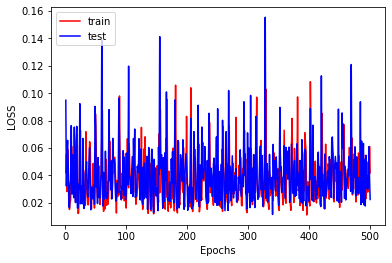

In [418]:
# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

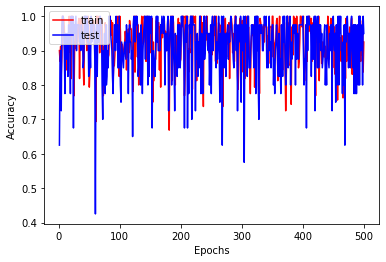

In [419]:
# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Comparation between the input test and his targets

In [420]:
#predict
predictions_targets = model.predict(input_test)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

In [421]:
# target
targets_val = label_encoder.inverse_transform(np.array(target_test.values).argmax(1))

In [422]:
# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df

,target,predicted
0,2,2
1,1,1
2,1,1
3,2,2
4,2,2
5,2,2
6,3,3
7,4,1
8,1,0
9,0,0


# Setting the inputs to predict

In [423]:
csv_file = 'test_ds.csv'
dfp = pd.read_csv(csv_file, header=0)
dfp

,Temperature,L,R,A_M,Color,Spectral_Class
0,21020,0.00150,0.01120,11.520,Blue,B
1,2935,0.00087,0.09320,16.880,Red,M
2,16390,1278.00000,5.68000,-3.320,Blue-white,B
3,3628,0.00550,0.39300,10.480,Red,M
4,3496,0.00125,0.33600,14.940,Red,M
5,3342,0.00150,0.30700,11.870,Red,M
6,17140,883.00000,5.65300,-2.640,Blue-white,B
7,24490,248490.00000,1134.50000,-8.240,Blue-white,B
8,11000,170000.00000,1779.00000,-9.900,Blue-white,B
9,24020,0.00159,0.01270,10.550,Blue,B


In [424]:
color_mapper={
    'Blue-white':'Blue-White',
    'Blue white':'Blue-White',
    'Blue White':'Blue-White',
    'white':'White',
    'yellowish':'Yellowish',
    'yellow-white':'White-Yellow',
}
dfp['color']=dfp['Color'].replace(color_mapper)
dfp[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,color
0,21020,0.00150,0.0112,11.52,Blue,B,Blue
1,2935,0.00087,0.0932,16.88,Red,M,Red
2,16390,1278.00000,5.6800,-3.32,Blue-white,B,Blue-White
3,3628,0.00550,0.3930,10.48,Red,M,Red
4,3496,0.00125,0.3360,14.94,Red,M,Red
5,3342,0.00150,0.3070,11.87,Red,M,Red
6,17140,883.00000,5.6530,-2.64,Blue-white,B,Blue-White
7,24490,248490.00000,1134.5000,-8.24,Blue-white,B,Blue-White
8,11000,170000.00000,1779.0000,-9.90,Blue-white,B,Blue-White
9,24020,0.00159,0.0127,10.55,Blue,B,Blue


In [425]:
color_mapper_encoder={
    'Blue':0,
    'Blue-White':1,
    'Orange':2,
    'Orange-Red':3,
    'Pale yellow orange':4,
    'Red':5,
    'White':6,
    'White-Yellow':7,
    'Whitish':8,
    'Yellowish':9,
    'Yellowish White':10,
}
dfp['color']=dfp['color'].replace(color_mapper_encoder)
dfp[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,color
0,21020,0.00150,0.0112,11.52,Blue,B,0
1,2935,0.00087,0.0932,16.88,Red,M,5
2,16390,1278.00000,5.6800,-3.32,Blue-white,B,1
3,3628,0.00550,0.3930,10.48,Red,M,5
4,3496,0.00125,0.3360,14.94,Red,M,5
5,3342,0.00150,0.3070,11.87,Red,M,5
6,17140,883.00000,5.6530,-2.64,Blue-white,B,1
7,24490,248490.00000,1134.5000,-8.24,Blue-white,B,1
8,11000,170000.00000,1779.0000,-9.90,Blue-white,B,1
9,24020,0.00159,0.0127,10.55,Blue,B,0


In [426]:
spectral_mapper_encoder={
    'A':0,
    'B':1,
    'F':2,
    'G':3,
    'K':4,
    'M':5,
    'O':6,
}
dfp['Spectral']=dfp['Spectral_Class'].replace(spectral_mapper_encoder)
dfp[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,color,Spectral
0,21020,0.00150,0.0112,11.52,Blue,B,0,1
1,2935,0.00087,0.0932,16.88,Red,M,5,5
2,16390,1278.00000,5.6800,-3.32,Blue-white,B,1,1
3,3628,0.00550,0.3930,10.48,Red,M,5,5
4,3496,0.00125,0.3360,14.94,Red,M,5,5
5,3342,0.00150,0.3070,11.87,Red,M,5,5
6,17140,883.00000,5.6530,-2.64,Blue-white,B,1,1
7,24490,248490.00000,1134.5000,-8.24,Blue-white,B,1,1
8,11000,170000.00000,1779.0000,-9.90,Blue-white,B,1,1
9,24020,0.00159,0.0127,10.55,Blue,B,0,1


In [427]:
del(dfp['Color'])
del(dfp['Spectral_Class'])
dfp=dfp[['Temperature','L','R','A_M','color','Spectral']]
dfp

,Temperature,L,R,A_M,color,Spectral
0,21020,0.00150,0.01120,11.520,0,1
1,2935,0.00087,0.09320,16.880,5,5
2,16390,1278.00000,5.68000,-3.320,1,1
3,3628,0.00550,0.39300,10.480,5,5
4,3496,0.00125,0.33600,14.940,5,5
5,3342,0.00150,0.30700,11.870,5,5
6,17140,883.00000,5.65300,-2.640,1,1
7,24490,248490.00000,1134.50000,-8.240,1,1
8,11000,170000.00000,1779.00000,-9.900,1,1
9,24020,0.00159,0.01270,10.550,0,1


In [428]:
inputs_predict = dfp.iloc[:, 0:6]
inputs_predict

,Temperature,L,R,A_M,color,Spectral
0,21020,0.00150,0.01120,11.520,0,1
1,2935,0.00087,0.09320,16.880,5,5
2,16390,1278.00000,5.68000,-3.320,1,1
3,3628,0.00550,0.39300,10.480,5,5
4,3496,0.00125,0.33600,14.940,5,5
5,3342,0.00150,0.30700,11.870,5,5
6,17140,883.00000,5.65300,-2.640,1,1
7,24490,248490.00000,1134.50000,-8.240,1,1
8,11000,170000.00000,1779.00000,-9.900,1,1
9,24020,0.00159,0.01270,10.550,0,1


# Normalize Data

In [429]:
# scale input data
x = inputs_predict.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs_predict = pd.DataFrame(x_scaled)
inputs_predict[0:10]

,0,1,2,3,4,5
0,0.599347,1.816992e-09,0.000001,0.726248,0.000,0.0
1,0.009299,9.752969e-10,0.000047,0.898873,0.625,0.8
2,0.448287,1.707437e-03,0.003188,0.248309,0.125,0.0
3,0.031909,7.161084e-09,0.000216,0.692754,0.625,0.8
4,0.027602,1.482986e-09,0.000184,0.836393,0.625,0.8
5,0.022577,1.816992e-09,0.000168,0.737520,0.625,0.8
6,0.472757,1.179708e-03,0.003173,0.270209,0.125,0.0
7,0.712561,3.319884e-01,0.637716,0.089855,0.125,0.0
8,0.272431,2.271239e-01,1.000000,0.036393,0.125,0.0
9,0.697227,1.937234e-09,0.000002,0.695008,0.000,0.0


#  Predicting the type of star

In [430]:
#predict
predictions_targets = model.predict(inputs_predict)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

In [431]:
dfpp = pd.DataFrame({'Type': predicted})
dfpp

,Type
0,2
1,0
2,3
3,1
4,0
5,1
6,3
7,5
8,5
9,2


In [432]:
dfpp.to_csv('prediction.csv')